In [1]:
import sys
sys.path.append('../src')

import matplotlib.pyplot as plt
import seaborn as sns

from data_loader import CMAPSSLoader

In [2]:
loader = CMAPSSLoader()
df = loader.load_dataset('FD001')

Loaded FD001: 20631 records, 100 engines


In [3]:
print(f"Shape: {df.shape}")
print(f"Engines: {df['engine_id'].nunique()}")
df.head()

Shape: (20631, 27)
Engines: 100


,engine_id,time_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


# Basic Statistics

In [4]:
print("Missing values: \n", df.isna().sum())

Missing values: 
 engine_id                0
time_cycles              0
operational_setting_1    0
operational_setting_2    0
operational_setting_3    0
sensor_1                 0
sensor_2                 0
sensor_3                 0
sensor_4                 0
sensor_5                 0
sensor_6                 0
sensor_7                 0
sensor_8                 0
sensor_9                 0
sensor_10                0
sensor_11                0
sensor_12                0
sensor_13                0
sensor_14                0
sensor_15                0
sensor_16                0
sensor_17                0
sensor_18                0
sensor_19                0
sensor_20                0
sensor_21                0
RUL                      0
dtype: int64


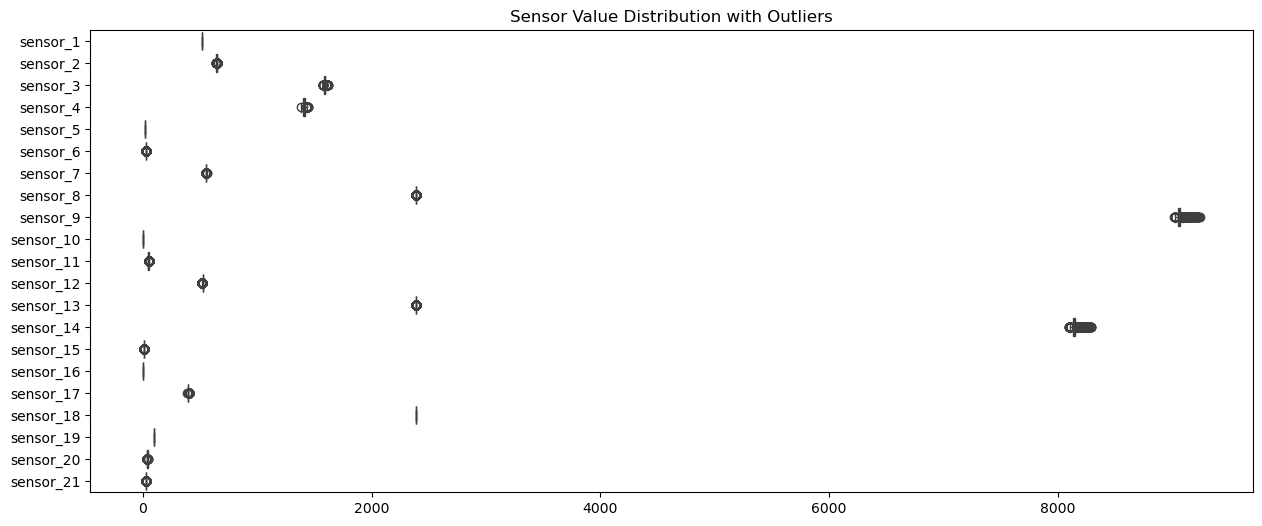

In [5]:
sensors = [c for c in df.columns if 'sensor' in c]

plt.figure(figsize=(15,6))
sns.boxplot(data=df[sensors], orient='h')
plt.title("Sensor Value Distribution with Outliers")
plt.show()

             count         mean           std        min        25%  \
sensor_1   20631.0   518.670000  0.000000e+00   518.6700   518.6700   
sensor_2   20631.0   642.680934  5.000533e-01   641.2100   642.3250   
sensor_3   20631.0  1590.523119  6.131150e+00  1571.0400  1586.2600   
sensor_4   20631.0  1408.933782  9.000605e+00  1382.2500  1402.3600   
sensor_5   20631.0    14.620000  5.329200e-15    14.6200    14.6200   
sensor_6   20631.0    21.609803  1.388985e-03    21.6000    21.6100   
sensor_7   20631.0   553.367711  8.850923e-01   549.8500   552.8100   
sensor_8   20631.0  2388.096652  7.098548e-02  2387.9000  2388.0500   
sensor_9   20631.0  9065.242941  2.208288e+01  9021.7300  9053.1000   
sensor_10  20631.0     1.300000  0.000000e+00     1.3000     1.3000   
sensor_11  20631.0    47.541168  2.670874e-01    46.8500    47.3500   
sensor_12  20631.0   521.413470  7.375534e-01   518.6900   520.9600   
sensor_13  20631.0  2388.096152  7.191892e-02  2387.8800  2388.0400   
sensor

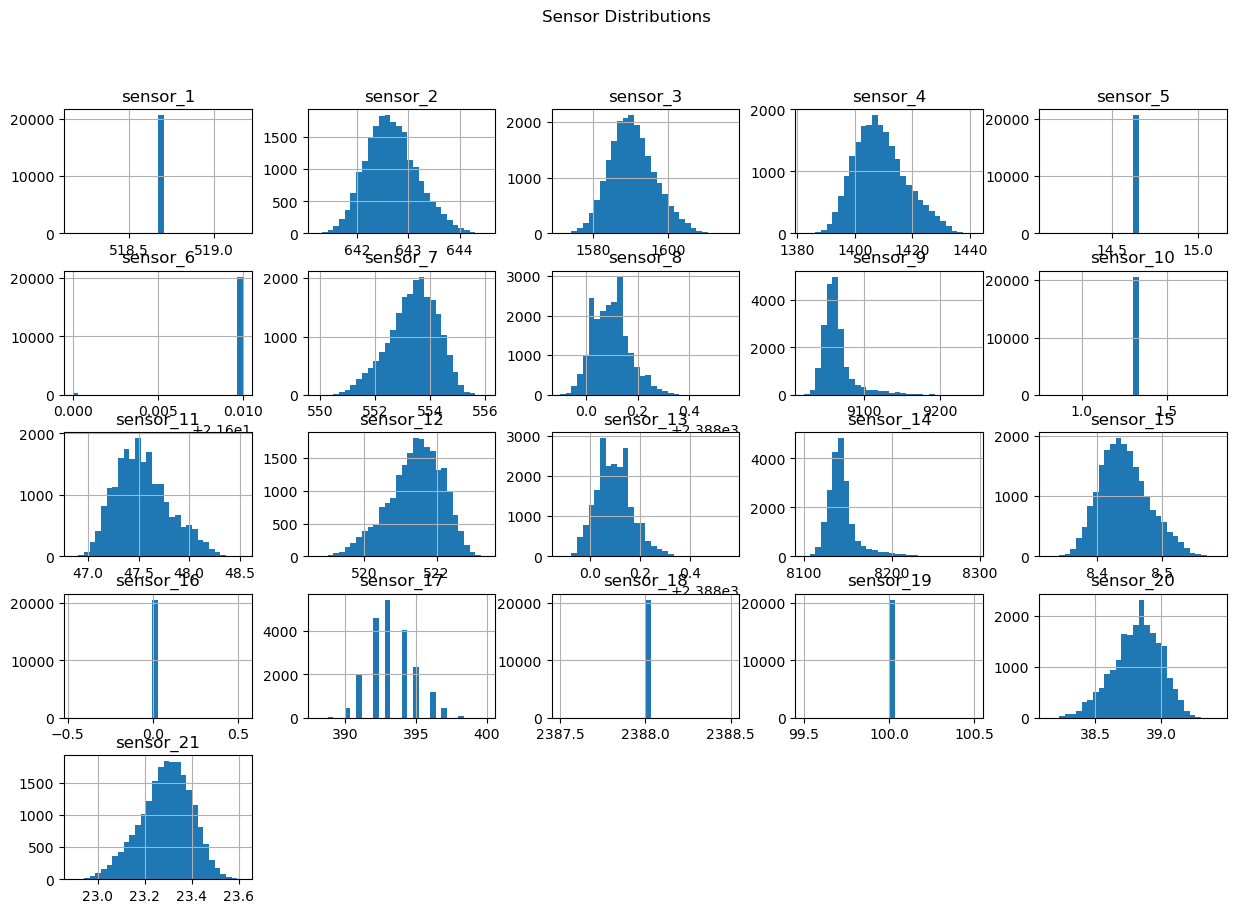

In [6]:
desc_stats = df[sensors].describe().T
desc_stats['skew'] = df[sensors].skew()
print(desc_stats)

df[sensors].hist(figsize=(15,10), bins=30)
plt.suptitle("Sensor Distributions")
plt.show()


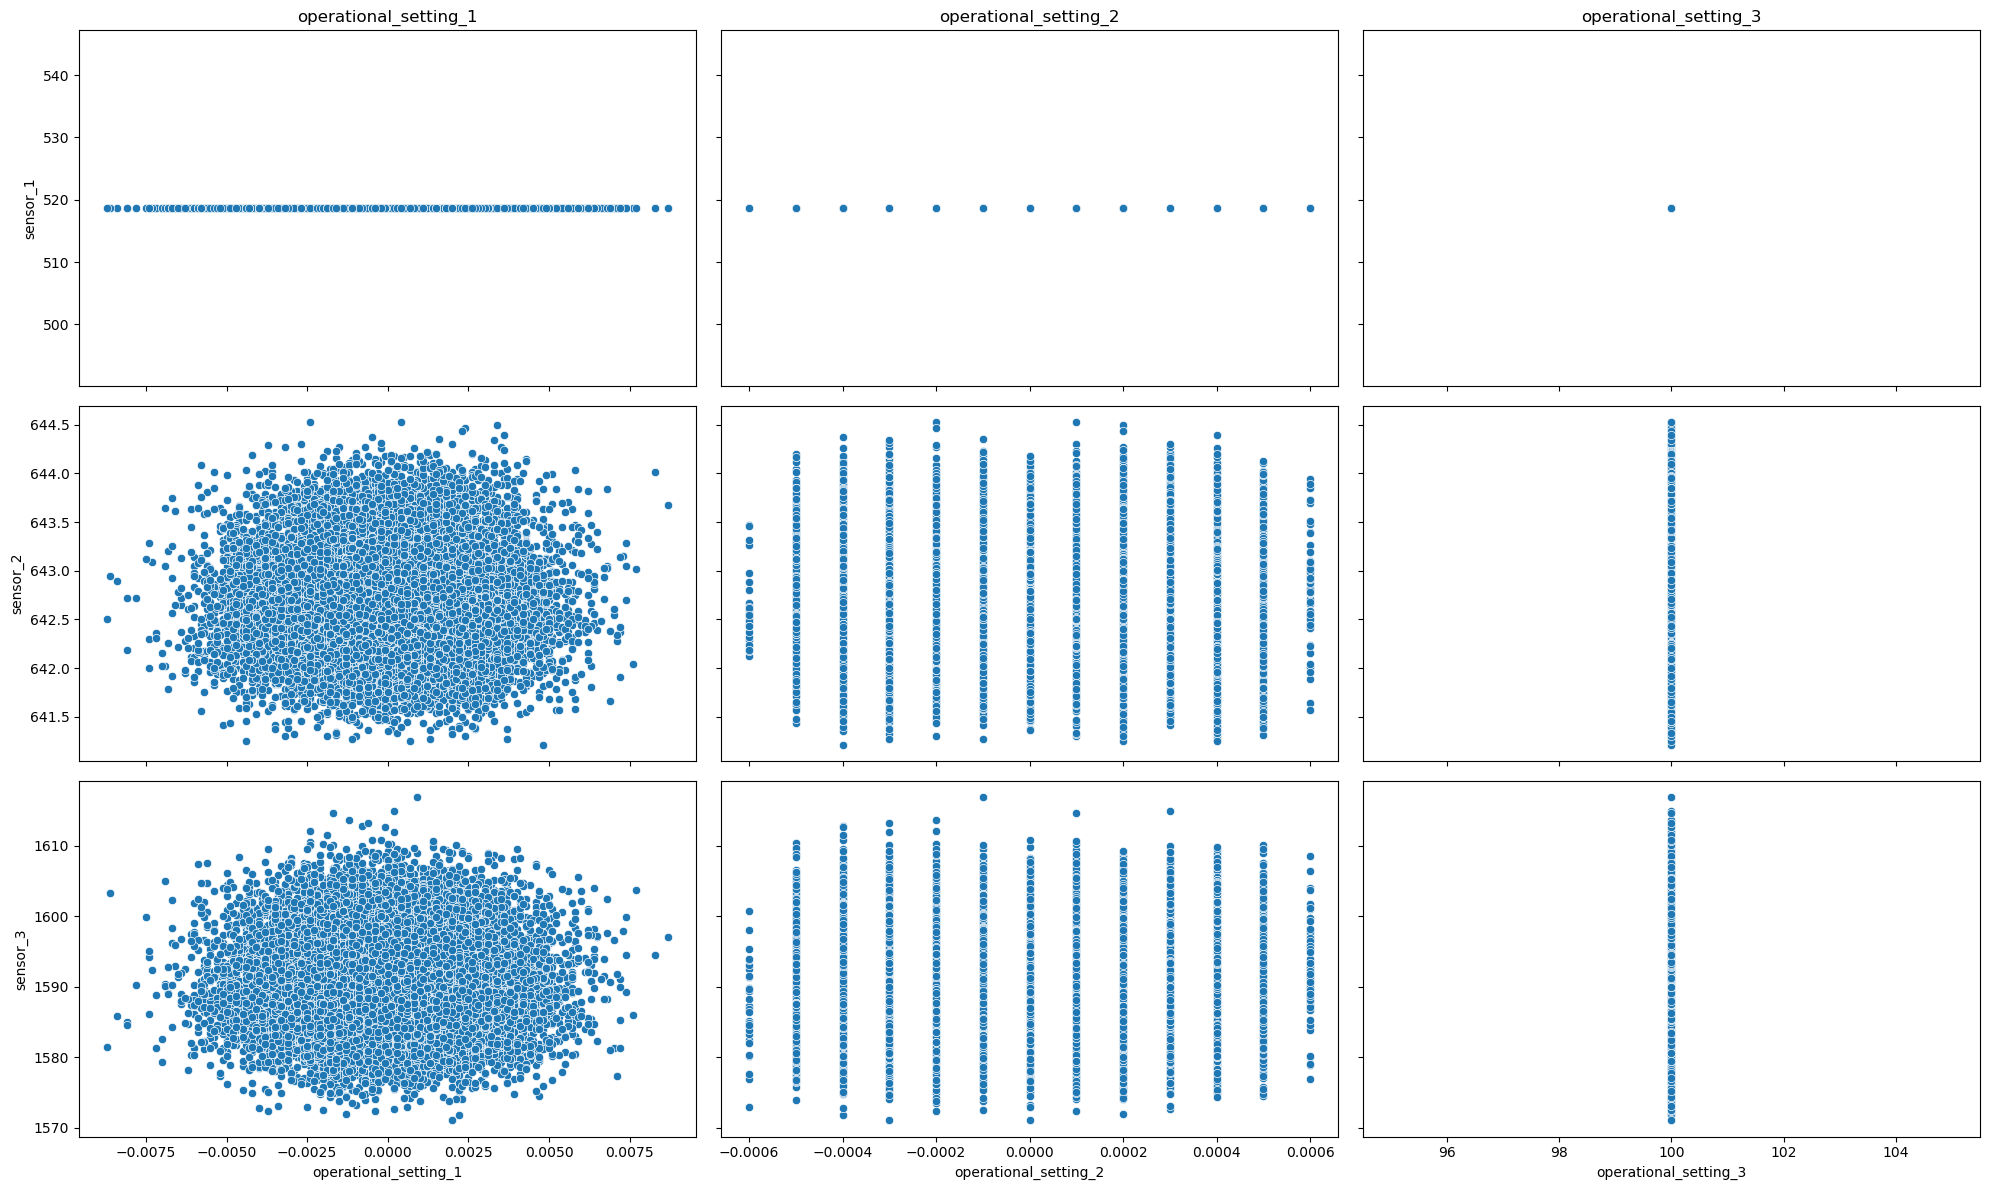

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

ops = [c for c in df.columns if 'setting' in c]
sensors_subset = sensors[:3]

fig, axes = plt.subplots(len(sensors_subset), len(ops), figsize=(20, 12), sharex='col', sharey='row')

for i, sensor in enumerate(sensors_subset):
    for j, op in enumerate(ops):
        ax = axes[i, j]
        sns.scatterplot(x=df[op], y=df[sensor], ax=ax)
        if i == 0:
            ax.set_title(op)
        if j == 0:
            ax.set_ylabel(sensor)

plt.tight_layout()
plt.show()


**Shows**: How much training data exists at each RUL level - this is valuable to assess the data availability for machine learning

**Question**: "How balanced is my training data across the degradation spectrum?"

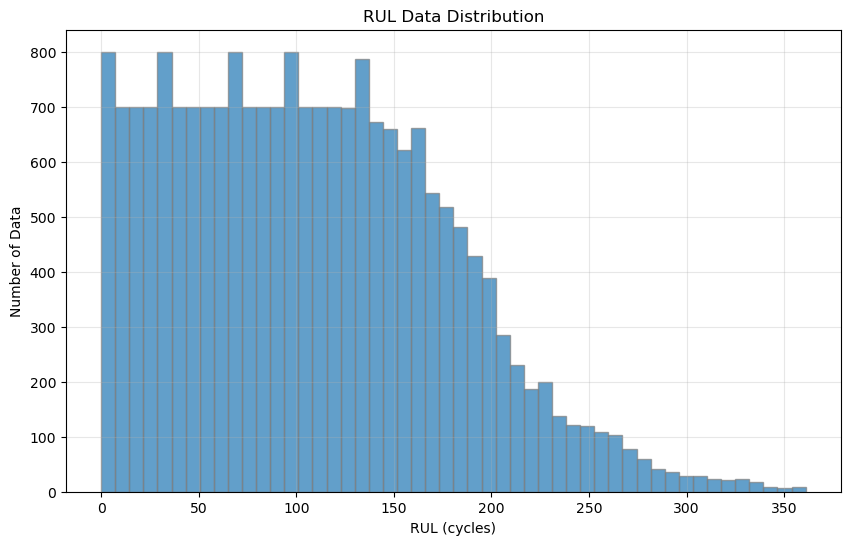

In [8]:
plt.figure(figsize=(10, 6))
plt.hist(df['RUL'], bins=50, alpha=0.7, edgecolor='grey')
plt.title('RUL Data Distribution')
plt.xlabel('RUL (cycles)')
plt.ylabel('Number of Data')
plt.grid(True, alpha=0.3)
plt.show()

**Shows**: How long each individual engine lasted - answers the actual engineering problem

**Question**: "What's the typical lifespan of engines in my fleet?"

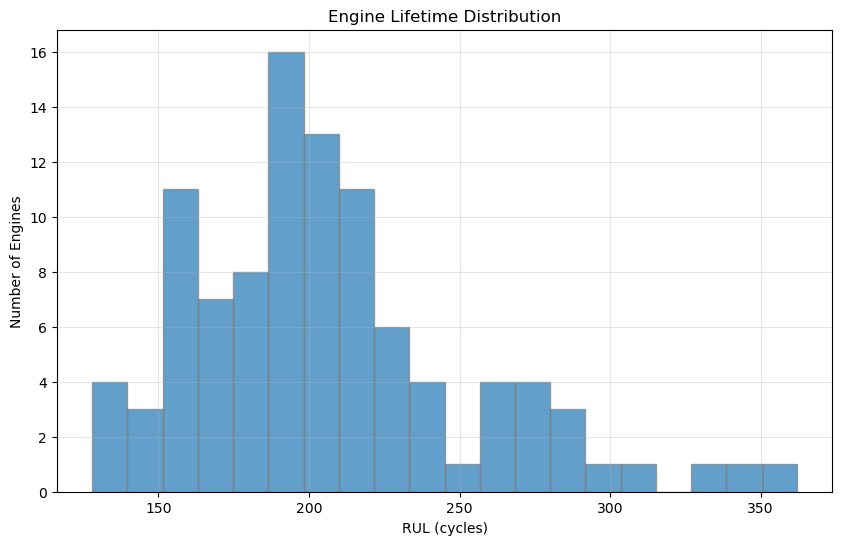

In [9]:
engine_lifetimes = df.groupby('engine_id')['time_cycles'].max()

plt.figure(figsize=(10, 6))
plt.hist(engine_lifetimes, bins=20, alpha=0.7, edgecolor='grey')
plt.title('Engine Lifetime Distribution')
plt.xlabel('RUL (cycles)')
plt.ylabel('Number of Engines')
plt.grid(True, alpha=0.3)
plt.show()

## Correlation Heatmap of Sensors
* **What it shows**: Pairwise correlation between all sensors. Red = strong positive correlation, blue = strong negative.

* **Why valuable**:

    * CMAPSS has many redundant sensors. Highly correlated sensors add little new information (they may be dropped).

    * Completely uncorrelated sensors may be uninformative or noise.

    * This helps dimension reduction and avoids overfitting.

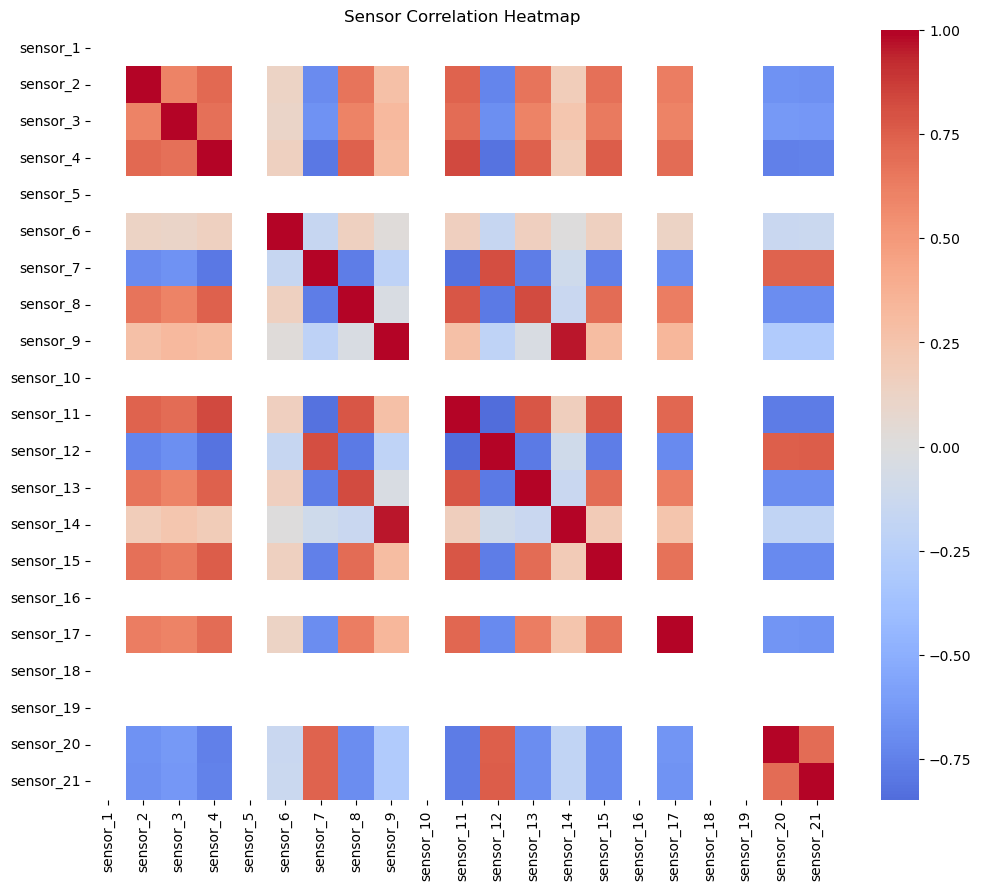

In [10]:
plt.figure(figsize=(12,10))
sns.heatmap(df[[c for c in df.columns if 'sensor' in c]].corr(), cmap='coolwarm', center=0)
plt.title("Sensor Correlation Heatmap")
plt.show()

## Engine Sensor Time-Series

* **What it shows**: How selected sensor values evolve over cycles for one engine (e.g., engine_id=1).

* **Why valuable**:

    * You can see degradation patterns: some sensors drift steadily as the engine wears, others fluctuate randomly.

    * Identifies which sensors are potential “health indicators.”

    * This visualization is often the first clue about which signals should be engineered into features.

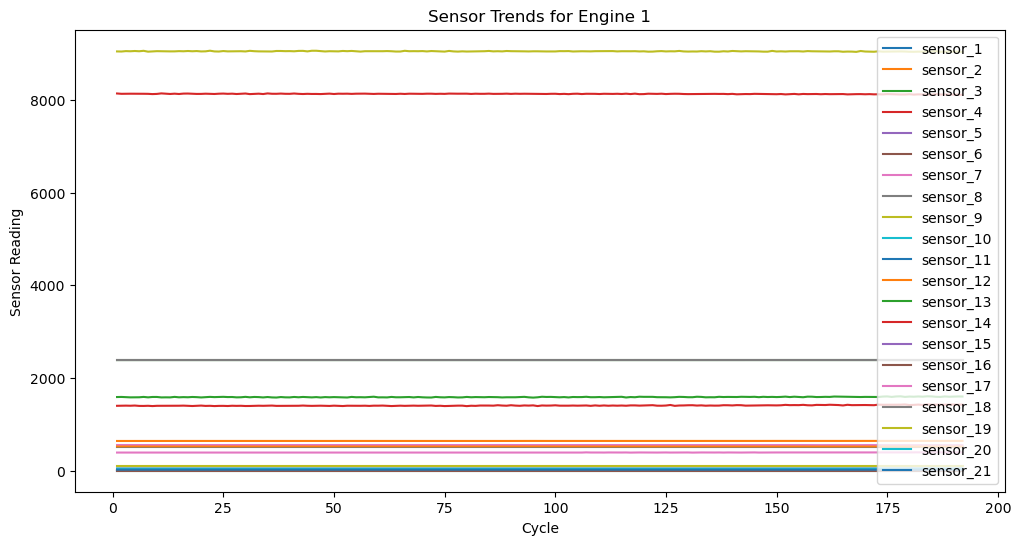

In [11]:
engine = 1
subset = df[df.engine_id == engine]
plt.figure(figsize=(12,6))
for s in [f'sensor_{i}' for i in range(1,22)]:
    plt.plot(subset['time_cycles'], subset[s], label=s)
plt.legend()
plt.title(f'Sensor Trends for Engine {engine}')
plt.xlabel("Cycle"); plt.ylabel("Sensor Reading")
plt.show()

## Operational Settings Distribution

* **What it shows**: Histograms of the three operating condition variables.

* **Why valuable**: Engines don’t always operate under the same conditions; settings can affect sensor behavior and degradation speed.


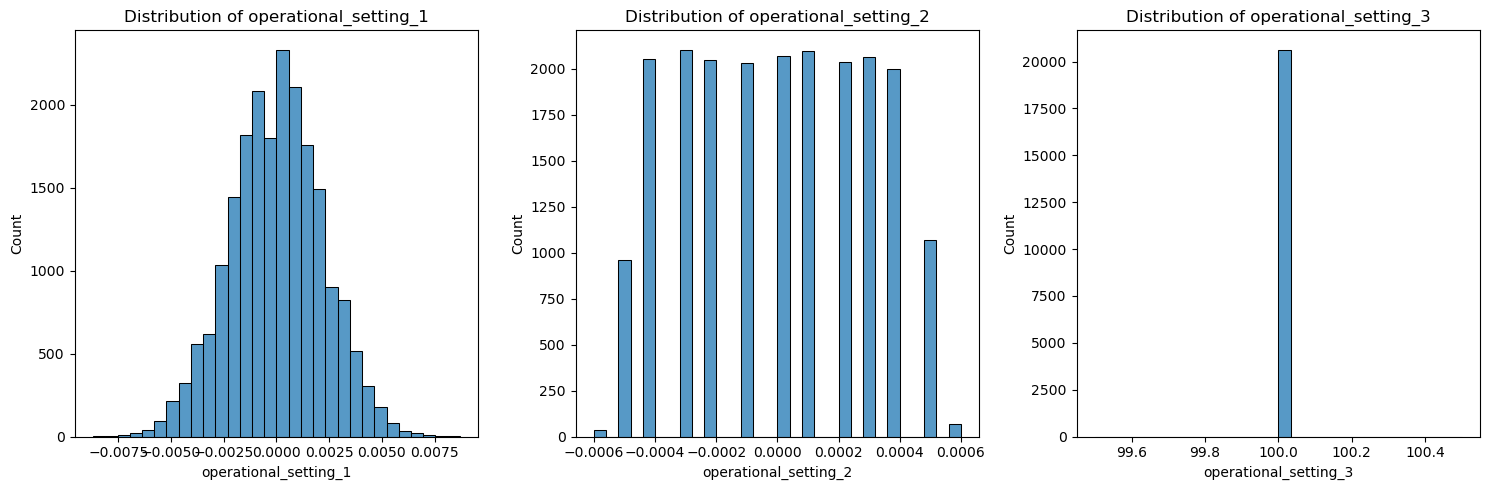

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))
for i, col in enumerate([f'operational_setting_{j}' for j in range(1,4)]):
    sns.histplot(df[col], bins=30, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

## Sensor Vs. RUL Scatter

* **What it shows**: Relationship between a single sensor reading and the Remaining Useful Life.

* **Why valuable**:

    * Sensors that show a clear monotonic trend with RUL (e.g., values increase/decrease as RUL decreases) are predictive.

    * Scatter plots help identify sensors that correlate with failure timing vs. those that are just noise.

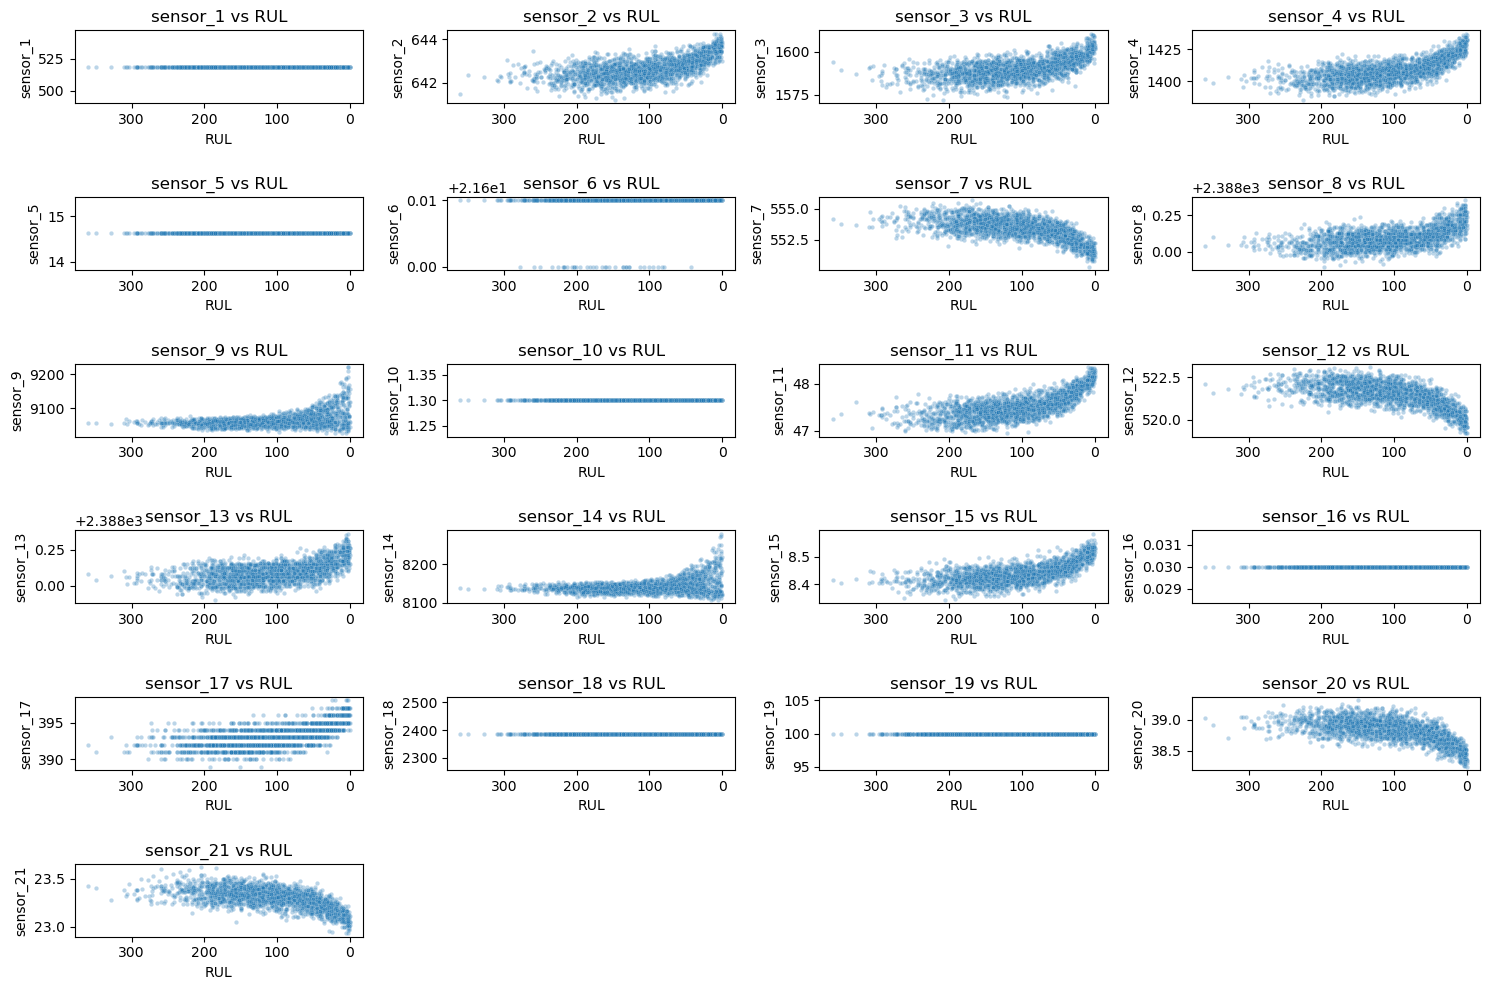

In [22]:
sensors = [c for c in df.columns if 'sensor' in c]

n_cols = 4
n_rows = int(len(sensors) / n_cols) + 1

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()

for i, sensor in enumerate(sensors):
    sns.scatterplot(
        x=df['RUL'].sample(2000, random_state=42),
        y=df[sensor].sample(2000, random_state=42),
        s=10, alpha=0.3,
        ax=axes[i]
    )
    axes[i].set_title(f"{sensor} vs RUL")
    axes[i].invert_xaxis()

# remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## Normalized Lifecycle Plots

* **What it shows**: Sensor trajectories averaged across engines, aligned by normalized cycle (0=start, 1=end-of-life).

* **Why valuable**:

    * Without normalization, engines run at different cycle counts, so trends are hard to compare.

    * Normalization reveals consistent degradation patterns across engines.

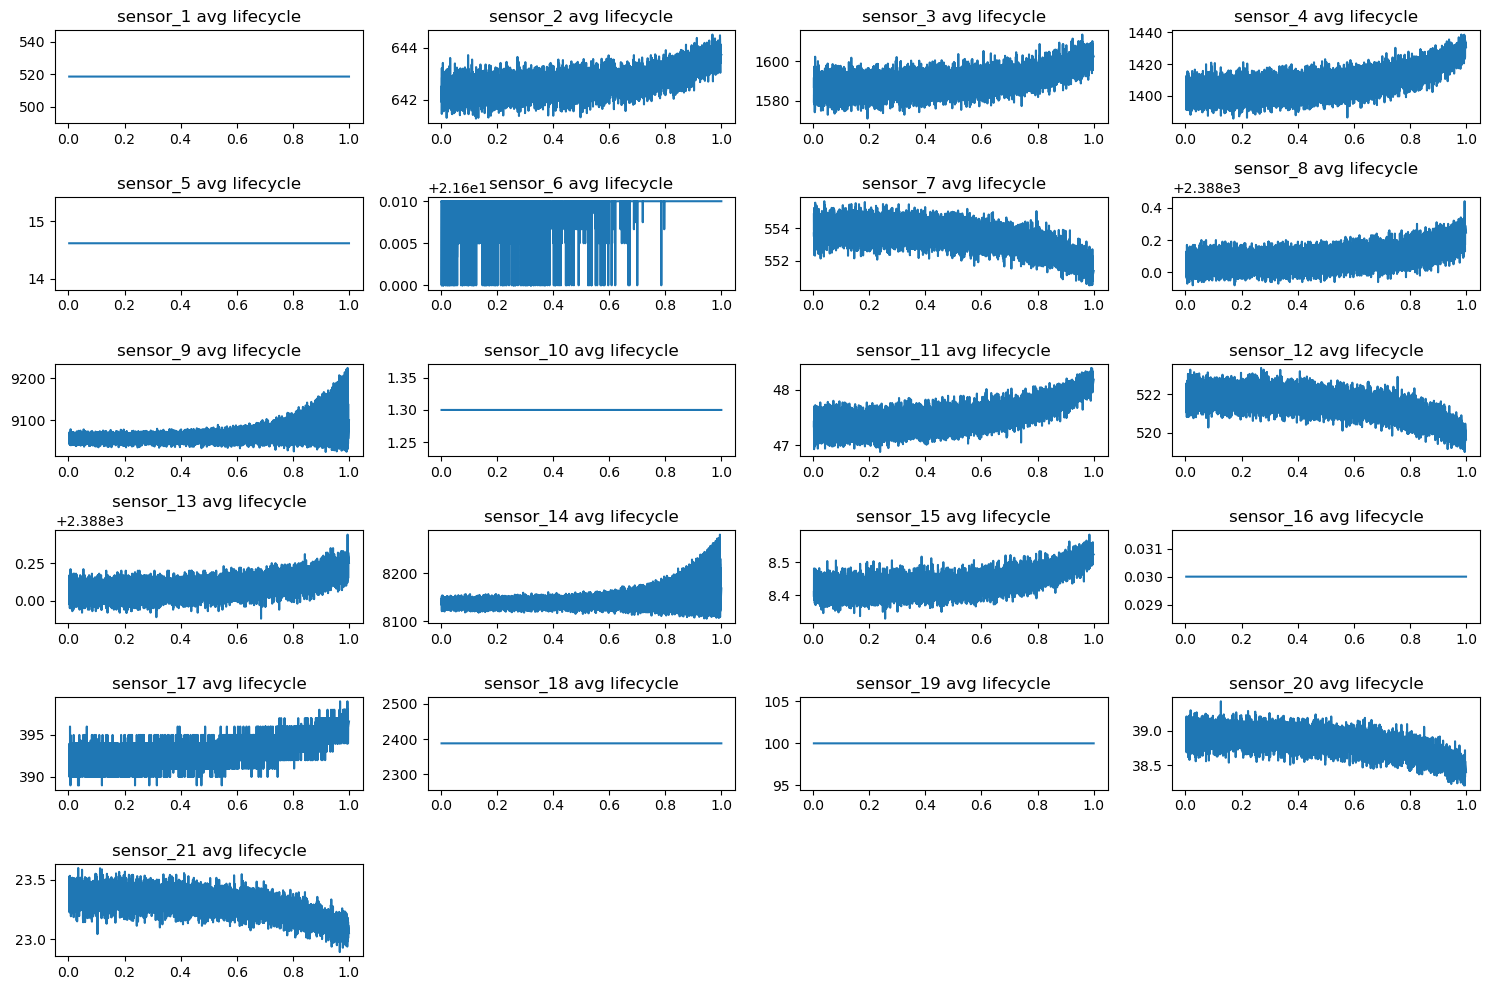

In [20]:
import matplotlib.pyplot as plt

sensors = [c for c in df.columns if 'sensor' in c]

normed = df.copy()
normed['cycle_norm'] = normed.groupby('engine_id')['time_cycles'].transform(
    lambda x: x / x.max()
)

n_cols = 4
n_rows = int(len(sensors) / n_cols) + 1

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()

for i, sensor in enumerate(sensors):
    avg_trend = normed.groupby('cycle_norm')[sensor].mean()
    axes[i].plot(avg_trend.index, avg_trend.values)
    axes[i].set_title(f"{sensor} avg lifecycle")

# remove empty axes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
